In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
nubb_meta_nodiff     = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_nodiff_reco.h5", "meta")
nubb_meta_5percent   = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_5percent_reco.h5", "meta")
nubb_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_0.25percent_reco.h5", "meta")
display(nubb_meta_nodiff)
display(nubb_meta_5percent)


Tl_meta_nodiff     = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_nodiff_reco.h5", "meta")
Tl_meta_5percent   = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_5percent_reco.h5", "meta")
Tl_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_0.25percent_reco.h5", "meta")
display(Tl_meta_nodiff)
display(Tl_meta_5percent)

Bi_meta_nodiff     = pd.read_hdf("../data/Trackreco/ATPC_Bi_1bar_nodiff_reco.h5", "meta")
Bi_meta_5percent   = pd.read_hdf("../data/Trackreco/ATPC_Bi_1bar_5percent_reco.h5", "meta")
Bi_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_Bi_1bar_0.25percent_reco.h5", "meta")
display(Bi_meta_nodiff)
display(Bi_meta_5percent)


Bkg_meta_nodiff      = pd.concat([Tl_meta_nodiff,     Bi_meta_nodiff])
Bkg_meta_5percent    = pd.concat([Tl_meta_5percent,   Bi_meta_5percent])
Bkg_meta_025percent  = pd.concat([Tl_meta_025percent, Bi_meta_025percent])


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,150,0,1,11,806,3099.387,2.007783,0.556586,0.437794,0.712355,0.621364,4.912382,4.520291,11.352677,9.764378,Primary
0,150,1,0,363,314,133.068,0.218959,0.218959,0.218959,0.000000,0.218959,1.892463,1.892463,3.272836,3.272836,Delta0
0,150,2,0,570,508,221.415,0.131589,0.131589,0.131589,0.000000,0.131589,2.394289,2.443388,6.800890,7.046699,Delta0
0,150,3,0,27,69,16.511,0.097290,0.097290,0.097290,0.097290,0.097290,1.746650,1.746650,0.998137,0.998137,Brem
0,151,0,1,993,529,3440.383,2.312352,0.527322,0.520378,0.499150,0.501580,2.016479,2.764672,4.298199,7.525400,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1559,1,0,450,543,47.703,0.050022,0.050022,0.050022,0.000000,0.050022,2.542236,2.542236,2.775798,2.775798,Delta0
0,1559,2,0,809,302,260.544,0.202343,0.202343,0.202343,0.000000,0.202343,1.457437,1.363697,3.146838,2.839444,Delta0
0,1559,3,0,302,364,46.390,0.130051,0.130051,0.130051,0.000000,0.130051,2.238209,2.238209,2.606576,2.606576,Delta1
0,1559,4,0,126,126,0.000,0.022022,0.022022,0.022022,0.022022,0.022022,0.000000,0.000000,0.000000,0.000000,Brem


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,150,0,1,25,175,3206.550,2.060234,0.528755,0.293407,0.775056,0.623253,5.266055,3.737853,4.161453,4.336473,Primary
0,150,1,0,71,68,78.362,0.194861,0.194861,0.194861,0.000000,0.194861,1.462884,1.462884,0.673220,0.673220,Delta0
0,150,2,0,127,116,189.856,0.209083,0.209083,0.209083,0.000000,0.209083,2.712425,2.712425,2.131235,2.131235,Delta0
0,151,0,1,207,130,3413.310,2.306095,0.587254,0.514399,0.514611,0.496549,1.549077,2.862928,1.142463,2.143368,Primary
0,151,1,0,216,216,0.000,0.034404,0.034404,0.034404,0.034404,0.034404,0.000000,0.000000,0.000000,0.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1558,2,0,92,92,0.000,0.035102,0.035102,0.035102,0.035102,0.035102,0.000000,0.000000,0.000000,0.000000,Brem
0,1558,3,0,93,93,0.000,0.027481,0.027481,0.027481,0.027481,0.027481,0.000000,0.000000,0.000000,0.000000,Brem
0,1559,0,1,102,136,3191.800,2.040418,0.492195,0.447119,0.427623,0.676562,4.058898,2.859161,3.555938,2.195982,Primary
0,1559,1,0,83,96,41.522,0.088691,0.088691,0.088691,0.000000,0.088691,1.278977,1.278977,0.517181,0.517181,Delta0


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,335000,0,1,79,679,1554.547,0.993141,0.483054,0.258466,0.729170,0.135830,3.178785,1.170008,7.255959,2.570518,Primary
0,335000,1,0,270,508,1472.551,1.141395,0.314092,0.606112,0.442134,0.769966,1.045208,1.902382,1.133897,3.799265,Brem
0,335000,2,0,832,809,100.037,0.189447,0.189447,0.189447,0.000000,0.189447,2.777771,2.777771,6.204369,6.204369,BremDelta0
0,335001,0,1,732,0,2832.883,1.705298,0.434074,0.393650,0.730310,0.250802,2.755907,1.220509,7.076464,1.133163,Primary
0,335001,1,0,836,882,622.411,0.666178,0.459966,0.592943,0.116858,0.639245,1.202429,3.261272,2.669178,5.263157,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,35300059,0,1,44,239,3579.689,2.031591,0.303453,0.233839,0.166582,0.104135,1.331337,1.022729,3.387688,0.749006,Primary
0,35300059,1,0,1052,1052,0.000,0.004241,0.004241,0.004241,0.004241,0.004241,0.000000,0.000000,0.000000,0.000000,Brem
0,35300059,2,0,1124,1124,0.000,0.005580,0.005580,0.005580,0.005580,0.005580,0.000000,0.000000,0.000000,0.000000,Brem
0,35300059,3,0,1077,1112,223.825,0.265881,0.265881,0.265881,0.265881,0.265881,1.977835,1.983278,4.669866,4.762309,Brem


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,35335000,0,1,62,121,3768.985,2.104415,0.394234,0.233449,0.792021,0.069780,1.885797,1.105025,0.948346,0.313209,Primary
0,35335000,1,0,64,64,0.000,0.067958,0.067958,0.067958,0.067958,0.067958,0.000000,0.000000,0.000000,0.000000,Brem
0,35335000,2,0,122,123,36.585,0.186231,0.186231,0.186231,0.186231,0.186231,1.728347,1.728347,0.912120,0.912120,Brem
0,35335001,0,1,192,78,3784.251,2.338891,0.522424,0.244857,0.605591,0.071707,2.190471,1.014758,1.853527,0.135424,Primary
0,35335001,1,0,49,59,37.533,0.016216,0.016216,0.016216,0.000000,0.016216,0.000000,0.000000,0.000000,0.000000,Delta0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,35300058,1,0,0,4,99.880,0.269506,0.269506,0.269506,0.269506,0.269506,1.346809,1.346809,0.548415,0.548415,Brem
0,35300059,0,1,2,29,3518.143,1.993036,0.332083,0.220918,0.172049,0.101133,1.248074,1.028706,0.597279,0.189263,Primary
0,35300059,1,0,128,128,0.000,0.002313,0.002313,0.002313,0.002313,0.002313,0.000000,0.000000,0.000000,0.000000,Brem
0,35300059,2,0,137,137,0.000,0.005226,0.005226,0.005226,0.005226,0.005226,0.000000,0.000000,0.000000,0.000000,Brem


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,50650000,0,1,32,1153,3896.755,2.211094,0.523429,0.274834,0.591902,0.121942,5.143538,1.040245,1.324540e+01,1.042374e+00,Primary
0,50650000,1,0,197,200,32.071,0.118420,0.118420,0.118420,0.000000,0.118420,1.554069,1.554069,1.069975e+00,1.069975e+00,Delta0
0,50650000,2,0,683,631,11.344,0.025321,0.025321,0.025321,0.000000,0.025321,0.000000,0.000000,0.000000e+00,0.000000e+00,Delta0
0,50650000,3,0,4,4,0.000,0.029487,0.029487,0.029487,0.029487,0.029487,0.000000,0.000000,0.000000e+00,0.000000e+00,Brem
0,50650000,4,0,0,3,6.213,0.070110,0.070110,0.070110,0.070110,0.070110,1.223090,1.223090,4.779550e-01,4.779550e-01,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1100058,2,0,28,56,178.377,0.254200,0.254200,0.254200,0.254200,0.254200,2.419233,2.419233,4.279221e+00,4.279221e+00,Brem
0,1100058,3,0,0,1,1.229,0.029884,0.029884,0.029884,0.029884,0.029884,1.000000,1.000000,6.061558e-09,6.061558e-09,Brem
0,1100059,0,1,635,936,1982.709,1.331487,0.468968,0.231756,0.563977,0.105326,2.871635,1.037424,6.546070e+00,1.172065e+00,Primary
0,1100059,1,0,120,39,519.541,0.500018,0.426659,0.496595,0.000000,0.500018,2.079038,2.149730,6.663400e+00,5.302558e+00,Delta0


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,50650000,0,1,13,248,3943.362,2.359119,0.580932,0.260400,0.618124,0.121008,3.795847,1.070711,3.005594e+00,4.316483e-01,Primary
0,50650000,1,0,0,1,9.611,0.072239,0.072239,0.072239,0.072239,0.072239,1.000000,1.000000,1.347200e-16,1.347200e-16,Brem
0,50650000,2,0,2,3,7.213,0.030066,0.030066,0.030066,0.030066,0.030066,1.000000,1.000000,3.855693e-18,3.855693e-18,Brem
0,50650001,0,1,101,137,3187.212,1.927950,0.585279,0.270202,0.547979,0.159644,2.884839,1.308628,2.657598e+00,4.359017e-01,Primary
0,50650001,1,0,127,124,32.377,0.116875,0.116875,0.116875,0.000000,0.116875,1.000000,1.000000,9.065112e-17,9.065112e-17,Delta0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1100058,1,0,0,0,0.000,0.032266,0.032266,0.032266,0.032266,0.032266,0.000000,0.000000,0.000000e+00,0.000000e+00,Brem
0,1100058,2,0,7,7,0.000,0.020781,0.020781,0.020781,0.020781,0.020781,0.000000,0.000000,0.000000e+00,0.000000e+00,Brem
0,1100058,3,0,3,5,108.584,0.284763,0.284763,0.284763,0.284763,0.284763,1.514864,1.514864,7.701061e-01,7.701061e-01,Brem
0,1100059,0,1,100,149,2463.899,1.823292,0.570647,0.209747,0.642799,0.101968,1.956670,1.100400,1.547296e+00,4.439454e-01,Primary


In [4]:
num_nubb_nodiff     = len(nubb_meta_nodiff.event_id.unique())
num_nubb_5percent   = len(nubb_meta_5percent.event_id.unique())
num_nubb_025percent = len(nubb_meta_025percent.event_id.unique())
num_Bkg_nodiff      = len(Bkg_meta_nodiff.event_id.unique())
num_Bkg_5percent    = len(Bkg_meta_5percent.event_id.unique())
num_Bkg_025percent  = len(Bkg_meta_025percent.event_id.unique())


sf_nubb_nodiff     = 1
sf_nubb_5percent   = num_nubb_nodiff / num_nubb_5percent
sf_nubb_025percent = num_nubb_nodiff / num_nubb_025percent
sf_Bkg_nodiff      = num_nubb_nodiff / num_Bkg_nodiff
sf_Bkg_5percent    = num_nubb_nodiff / num_Bkg_5percent
sf_Bkg_025percent  = num_nubb_nodiff / num_Bkg_025percent

print("tot, scale fact num_nubb_nodiff:",     num_nubb_nodiff,     sf_nubb_nodiff)
print("tot, scale fact num_nubb_5percent:",   num_nubb_5percent,   sf_nubb_5percent)
print("tot, scale fact num_nubb_025percent:", num_nubb_025percent, sf_nubb_025percent)
print("tot, scale fact num_Tl_nodiff:",       num_Bkg_nodiff,      sf_Bkg_nodiff)
print("tot, scale fact num_Tl_5percent:",     num_Bkg_5percent,    sf_Bkg_5percent)
print("tot, scale fact num_Tl_025percent:",   num_Bkg_025percent,  sf_Bkg_025percent)

tot, scale fact num_nubb_nodiff: 186230 1
tot, scale fact num_nubb_5percent: 188214 0.9894588075276015
tot, scale fact num_nubb_025percent: 188036 0.9903954561892404
tot, scale fact num_Tl_nodiff: 343620 0.5419649612944532
tot, scale fact num_Tl_5percent: 346457 0.5375270235555928
tot, scale fact num_Tl_025percent: 216920 0.8585192697768763


Running cuts with
Pressure: 1 bar
Diffusion: nodiff
Targ efficiency: 30 %
Running cuts with
Pressure: 1 bar
Diffusion: 5percent
Targ efficiency: 30 %
Running cuts with
Pressure: 1 bar
Diffusion: 0.25percent
Targ efficiency: 30 %
Running cuts with
Pressure: 1 bar
Diffusion: nodiff
Targ efficiency: 30 %
Running cuts with
Pressure: 1 bar
Diffusion: 5percent
Targ efficiency: 30 %
Running cuts with
Pressure: 1 bar
Diffusion: 0.25percent
Targ efficiency: 30 %


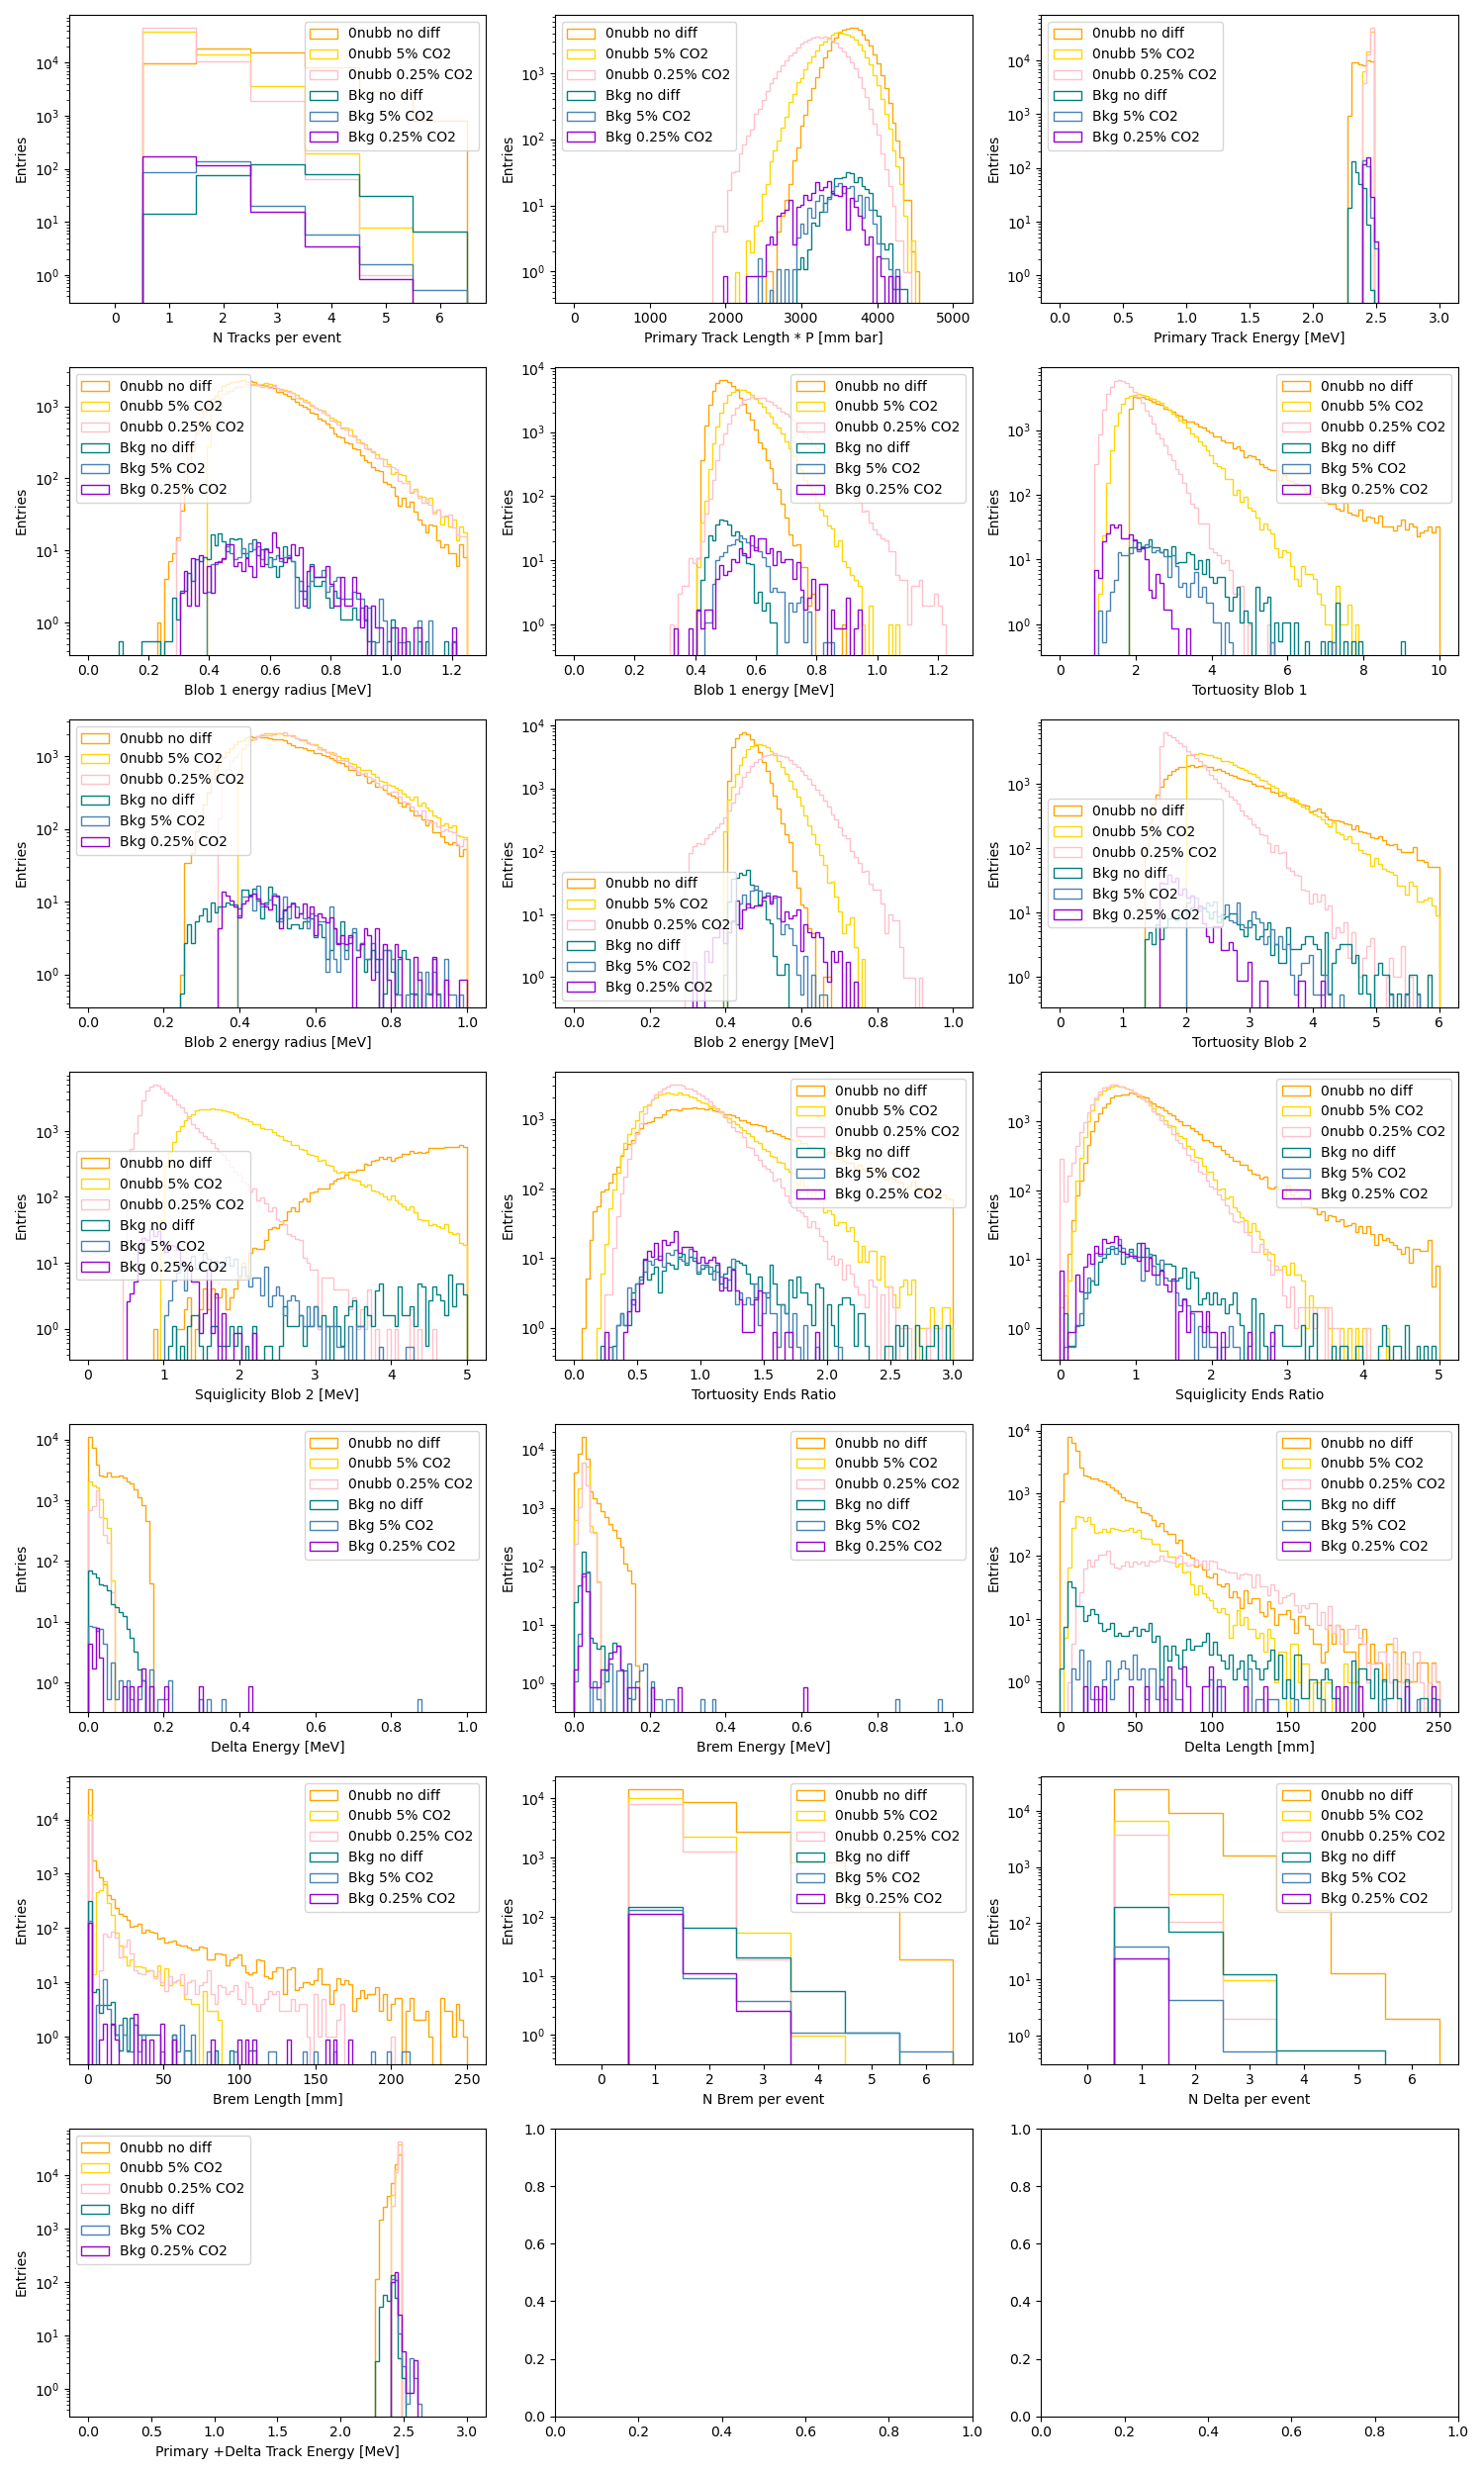

In [6]:
# Plot some variables like number of tracks
%matplotlib widget


def FOM(eff, bkg_eff):
    return eff/np.sqrt(bkg_eff)

def CalcEfficiency(n, N, label):
    efficiency = n/N
    error=np.sqrt( (efficiency/N) * (1-efficiency)  )

    if (label == "Bkg"):
        print(f"Bkg Rej: {label}:", round(100*efficiency, 2), "+/-", round(100*error,2),  "%", "     (bkg rej ==", round(100-100*efficiency,2), "%)")
    else:
        print(f"Efficiency {label}:",  round(100*efficiency, 2), " +/-", round(100*error,2),  "%")

    return efficiency, error


# Function to compute count-based ratio per event_id
def compute_ratio(group):
    # Group 1: Count of Primary + Delta*
    count_group1 = group[group["label"].str.startswith(("Primary", "Delta"))].shape[0]

    # Group 2: Count of Brem* where 0.025 < energy < 0.035 (X-rays)
    count_xrays = group[(group["label"].str.startswith("Brem")) & (group["energy"].between(0.025, 0.035))].shape[0]

    # Group 3: Count of Brem* where energy ≤ 0.025 or ≥ 0.035
    count_group3 = group[(group["label"].str.startswith("Brem")) & (~group["energy"].between(0.025, 0.035))].shape[0]

    # Compute ratio
    ratio = count_xrays / (count_group1 + count_group3)
    
    return ratio

# applies cuts to the delta, brem and primary+delta energies
def ApplyGeneralCuts(df_meta, df_primary, cut_brem, cut_delta, cut_trk_e):

    brems  = GetBrems(df_meta)

    brems = brems[brems.energy > cut_brem] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(brems.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(brems.event_id.unique())]

    deltas  = GetDeltas(df_meta)

    deltas = deltas[deltas.energy > cut_delta] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(deltas.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(deltas.event_id.unique())]


    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    trk_energies = trk_energies[trk_energies > cut_trk_e]
    unique_events_list = trk_energies.index.unique().tolist()

    df_meta = df_meta[~df_meta.event_id.isin(unique_events_list)]
    df_primary = df_primary[~df_primary.event_id.isin(unique_events_list)]

    return df_meta, df_primary



def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


def GetNParticles(df_meta, label):
    # Set threshold for cumulative_distance
    threshold = 0

    # Filter events with brem in the name
    filtered_df = df_meta[df_meta["label"].str.contains(label, na=False)]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": f"N_{label}"}, inplace=True)

    return trk_counts


def GetDeltas(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Delta", na=False)]

    return filtered_df

def GetBrems(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Brem", na=False)]

    return filtered_df

# Gets the sum of the primary track and the delta energies
def GetTrackDeltaEnergy(df_meta):
    # Filter events with brem in the name
    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    return trk_energies.values


def ApplyCuts(df_meta, df_primary, pressure, diffusion, eff_targ):

    cuts = []

    # 1 bar
    if (pressure == 1):
       
       # 1bar no diff
        if (diffusion == "nodiff"):
            
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 0.175, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.41) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.3) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.35) & (df_primary.Tortuosity1 > 1.85)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.3, 0.3, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.15) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.2) & (df_primary.Tortuosity1 > 1.6)
            
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary,3, 0.75, 2.5)
                cuts =  (df_primary.blob2R > 0.24) &  (df_primary.Tortuosity2 > 1.15) &  (df_primary.energy > 1.72) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 5%
        elif (diffusion == "5percent"):
            # 30% signal eff
            if (eff_targ == 30):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.4)     & (df_primary.blob1R > 0.4) & (df_primary.energy > 2.4) & \
                    (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 2) & (df_primary.Squiglicity2 > 1)

            # 60% signal eff
            elif (eff_targ == 60):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.4) & (df_primary.Tortuosity2 > 1.2) & (df_primary.Tortuosity1 > 1.7) & (df_primary.energy > 1.9) & (df_primary.energy < 2.5)

            # 90% signal eff
            elif (eff_targ == 90):
                cuts = (df_primary.blob2R > 0.33) & (df_primary.blob1R > 0.3) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.25%
        elif (diffusion == "0.25percent"):
            # 30% signal eff
            if (eff_targ == 30):
                cuts = (df_primary.blob2R > 0.35) & (df_primary.blob2 > 0.3)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & \
                    (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.6) & (df_primary.Squiglicity2 > 0.5)

            # 60% signal eff
            elif (eff_targ == 60):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.4) & (df_primary.energy > 1.9) & (df_primary.energy < 2.5)

            # 90% signal eff
            elif (eff_targ == 90):
                cuts = (df_primary.blob2R > 0.275) & (df_primary.blob1R > 0.28) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")
    # -------------------------------------------------------------------------------------------------------------------------------------
    # 5bar
    elif (pressure == 5):
    
        # 5 bar no diff
        if (diffusion == "nodiff"):
            
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) & (df_primary.blob1 > 0.35) & (df_primary.energy > 2.3) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.35) & (df_primary.Tortuosity1 > 1.65)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.2) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.1) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.25) & (df_primary.Tortuosity1 > 1.25)
            
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.46, 3,2.5)
                cuts =  (df_primary.blob2R > 0.21) & (df_primary.blob1R > 0.19) & (df_primary.energy > 0) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 10bar
    elif (pressure == 10):

        # 10bar no diff
        if (diffusion == "nodiff"):
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.1) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.27) & (df_primary.Tortuosity1 > 1.25)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.125, 3, 2.5)
                cuts = (df_primary.blob2R > 0.2) & (df_primary.blob2 > 0.15) & (df_primary.blob1 > 0.15) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.02)
        
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.46, 3,2.5)
                cuts =  (df_primary.blob2R > 0.21) & (df_primary.blob1R > 0.19) & (df_primary.energy > 0) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 15bar
    elif (pressure == 15):
        
        # 15bar no diff
        if (diffusion == "nodiff"):
        
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.15)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.478, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5)
        
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.478, 3,2.5)
                cuts =  (df_primary.blob2R > 0.17) & (df_primary.blob1R > 0.17) & (df_primary.energy > 0) & (df_primary.energy < 2.5)
            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    else:
        print("Unknown pressure specified")

    return df_meta, df_primary, cuts

def PlotDistributionswithCuts(df_meta, col, label, pressure, diffusion, eff_targ, scale_factor):

    print("Running cuts with")
    print("Pressure:",  pressure,"bar")
    print("Diffusion:", diffusion )
    print("Targ efficiency:", eff_targ, "%")

    uselog=True

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, eff_targ)
    

    df_primary = df_primary[ cuts ]

    df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    df_counts      = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem  = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    # Calculate the ratio of x-rays to tracks
    # x_ray_ratio = df_meta.groupby("event_id").apply(compute_ratio).reset_index(name="ratio")


    weights        = np.ones_like(df_primary.energy)  * scale_factor
    weights_counts = np.ones_like(df_counts.N_tracks) * scale_factor
    weights_deltas = np.ones_like(deltas.energy)      * scale_factor
    weights_brem   = np.ones_like(brems.energy)       * scale_factor
    weights_Ndelta = np.ones_like(N_delta.N_Delta)    * scale_factor
    weights_Nbrem  = np.ones_like(N_brem.N_Brem)      * scale_factor
    weights_trke   = np.ones_like(trk_e)              * scale_factor

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_counts);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()
    if (uselog): axs[0,0].semilogy()

    axs[0,1].hist(df_primary.length*pressure, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length * P [mm bar]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()
    if (uselog): axs[0,1].semilogy()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()
    if (uselog): axs[0,2].semilogy()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()
    if (uselog): axs[1,1].semilogy()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()
    if (uselog): axs[2,1].semilogy()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()
    if (uselog): axs[1,0].semilogy()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()
    if (uselog): axs[2,0].semilogy()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()
    if (uselog): axs[1,2].semilogy()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()
    if (uselog): axs[2,2].semilogy()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()
    if (uselog): axs[3,0].semilogy()

    axs[3,1].hist(df_primary.Tortuosity1/df_primary.Tortuosity2, bins = np.linspace(0, 3, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Ends Ratio")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    if (uselog): axs[3,1].semilogy()

    axs[3,2].hist(df_primary.Squiglicity1/df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Ends Ratio")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()
    if (uselog): axs[3,2].semilogy()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()
    if (uselog): axs[4,0].semilogy()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()
    if (uselog): axs[4,1].semilogy()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()
    if (uselog): axs[4,2].semilogy()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()
    if (uselog): axs[5,0].semilogy()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Nbrem);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()
    if (uselog): axs[5,1].semilogy()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Ndelta);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()
    if (uselog): axs[5,2].semilogy()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights_trke);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    if (uselog): axs[6,0].semilogy()


    bin_edges = np.arange(-0.5, 3.5, 0.5)
    bin_centers = np.arange(0, 3, 0.5)

    # Multiplicities
    # axs[6,1].hist(x_ray_ratio.ratio, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[6,1].set_xlabel("N x-rays per track")
    # axs[6,1].set_ylabel("Entries")
    # axs[6,1].set_xticks(bin_centers) ;
    # axs[6,1].legend()
    # if (uselog): axs[6,1].semilogy()



    plt.tight_layout()

    return len(df_primary.event_id.unique())

fig, axs = plt.subplots(7, 3, figsize=(15, 25))


num_nubb_nodiff_cut     = PlotDistributionswithCuts(nubb_meta_nodiff,     "orange",  "0nubb no diff", 1,   "nodiff",      30,  sf_nubb_nodiff)
num_nubb_5percent_cut   = PlotDistributionswithCuts(nubb_meta_5percent,   "gold",    "0nubb 5% CO2", 1,    "5percent",    30,  sf_nubb_5percent)
num_nubb_025percent_cut = PlotDistributionswithCuts(nubb_meta_025percent, "Pink",    "0nubb 0.25% CO2", 1, "0.25percent", 30,  sf_nubb_025percent)

num_Bkg_nodiff_cut     = PlotDistributionswithCuts(Bkg_meta_nodiff,     "Teal",       "Bkg no diff", 1,   "nodiff",      30,  sf_Bkg_nodiff)
num_Bkg_5percent_cut   = PlotDistributionswithCuts(Bkg_meta_5percent,   "steelblue",  "Bkg 5% CO2", 1,    "5percent",    30,  sf_Bkg_5percent)
num_Bkg_025percent_cut = PlotDistributionswithCuts(Bkg_meta_025percent, "darkviolet", "Bkg 0.25% CO2", 1, "0.25percent", 30,  sf_Bkg_025percent)



In [9]:
def ApplyCutsnoPlot(df_meta, pressure, diffusion, eff_targ):
    
    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, eff_targ)
    df_primary = df_primary[ cuts ]

    return len(df_primary.event_id.unique())


On eff target: 30 %
On Diffusion no diff
Efficiency nubb: 30.25  +/- 0.11 %
Bkg Rej: Bkg: 0.18 +/- 0.01 %      (bkg rej == 99.82 %)
On Diffusion 5% CO2
Efficiency nubb: 30.02  +/- 0.11 %
Bkg Rej: Bkg: 0.14 +/- 0.01 %      (bkg rej == 99.86 %)
On Diffusion 0.25% CO2
Efficiency nubb: 30.88  +/- 0.11 %
Bkg Rej: Bkg: 0.16 +/- 0.01 %      (bkg rej == 99.84 %)
On eff target: 60 %
On Diffusion no diff
Efficiency nubb: 60.15  +/- 0.11 %
Bkg Rej: Bkg: 1.26 +/- 0.02 %      (bkg rej == 98.74 %)
On Diffusion 5% CO2
Efficiency nubb: 61.12  +/- 0.11 %
Bkg Rej: Bkg: 2.86 +/- 0.03 %      (bkg rej == 97.14 %)
On Diffusion 0.25% CO2
Efficiency nubb: 62.61  +/- 0.11 %
Bkg Rej: Bkg: 3.0 +/- 0.04 %      (bkg rej == 97.0 %)
On eff target: 90 %
On Diffusion no diff
Efficiency nubb: 89.99  +/- 0.07 %
Bkg Rej: Bkg: 6.53 +/- 0.04 %      (bkg rej == 93.47 %)
On Diffusion 5% CO2
Efficiency nubb: 90.4  +/- 0.07 %
Bkg Rej: Bkg: 8.54 +/- 0.05 %      (bkg rej == 91.46 %)
On Diffusion 0.25% CO2
Efficiency nubb: 90.24 

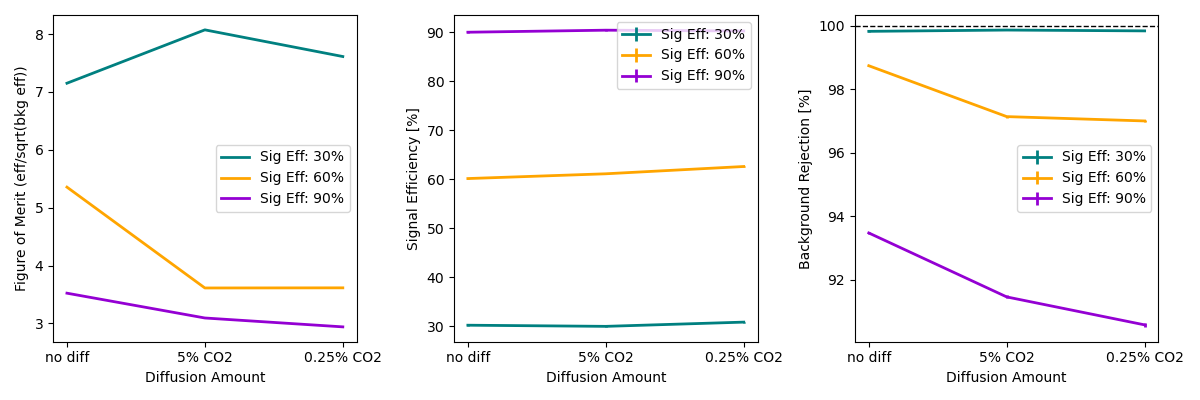

In [10]:
nubb_meta = [nubb_meta_nodiff, nubb_meta_5percent, nubb_meta_025percent]
Bkg_meta  = [Bkg_meta_nodiff,  Bkg_meta_5percent,  Bkg_meta_025percent]

num_nubb = [num_nubb_nodiff, num_nubb_5percent, num_nubb_025percent]
num_Bkg  = [num_Bkg_nodiff,  num_Bkg_5percent,  num_Bkg_025percent]

cols = ["Teal", "Orange", "darkviolet"]
diffusion_labels = ["no diff", "5% CO2", "0.25% CO2"]
diffusions = ["nodiff","5percent", "0.25percent"]
pressures = [1, 1, 1]


fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for e, efficiency in enumerate([30, 60, 90]):
    print("On eff target:", efficiency, "%")

    fom = []
    eff = []
    eff_err = []
    Bkg_eff = []
    Bkg_err = []

    # Loop over pressures
    for index in range(len(nubb_meta)):
        print("On Diffusion", diffusion_labels[index])
        nubb_cut = ApplyCutsnoPlot(nubb_meta[index], pressures[index], diffusions[index], efficiency)
        Bkg_cut  = ApplyCutsnoPlot(Bkg_meta[index],  pressures[index], diffusions[index], efficiency)
        
        fom.append(FOM(nubb_cut  / num_nubb[index],  Bkg_cut  / num_Bkg[index]))
        
        nubb_eff, nubb_err =  CalcEfficiency(nubb_cut, num_nubb[index], "nubb")
        eff.append(100*nubb_eff)
        eff_err.append(100*nubb_err)
        
        Bkg_eff_, Bkg_err_ =  CalcEfficiency(Bkg_cut, num_Bkg[index], "Bkg")
        Bkg_eff.append(100-100*Bkg_eff_)
        Bkg_err.append(100*Bkg_err_)

    axs[0].plot(diffusion_labels, fom, color=cols[e], linewidth = 2, label =f"Sig Eff: {efficiency}%")
    axs[0].set_xlabel("Diffusion Amount")
    axs[0].set_ylabel("Figure of Merit (eff/sqrt(bkg eff))")

    axs[1].errorbar(diffusion_labels, eff, eff_err, color=cols[e], linewidth = 2, label =f"Sig Eff: {efficiency}%")
    axs[1].set_xlabel("Diffusion Amount")
    axs[1].set_ylabel("Signal Efficiency [%]")

    axs[2].errorbar(diffusion_labels, Bkg_eff, Bkg_err, color=cols[e], linewidth = 2, label =f"Sig Eff: {efficiency}%")
    axs[2].set_xlabel("Diffusion Amount")
    axs[2].set_ylabel("Background Rejection [%]")

plt.tight_layout()
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[2].axhline(y=100, color='k', linestyle='--', linewidth=1)